### 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish.csv
- 피쳐/특성 : 무게
- 라벨/타겟 : 길이 

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
import numpy as np 
import matplotlib.pyplot as plt

In [7]:
# 데이터 준비
fishDF = pd.read_csv('../data/fish.csv', usecols=[0,1,2])
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [11]:
# 학습에 사용할 데이터 추출 => Perch 행만 추출
perchDF = fishDF[fishDF.Species == 'Perch']
# 인덱스 정리
perchDF.reset_index(drop= True, inplace = True)

In [14]:
# 추출된 데이터 기본 정보 확인
perchDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  56 non-null     object 
 1   Weight   56 non-null     float64
 2   Length   56 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [15]:
# 수치 컬럼의 데이터 정보 확인
perchDF.describe()

,Weight,Length
count,56.000000,56.000000
mean,382.239286,27.892857
std,347.617717,9.021668
min,5.900000,8.400000
25%,120.000000,21.825000
50%,207.500000,25.300000
75%,692.500000,36.625000
max,1100.000000,44.000000


(3) 데이터 전처리 <hr>
- 결측치, 이상치, 중복값 처리
- 데이터 분포, 컬럼 분포, 최빈값, 고유값

(3-1) 데이터의 분포

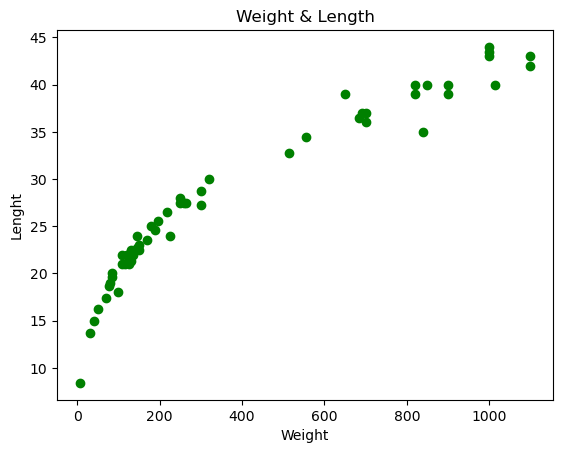

In [20]:
# 무게와 길이에 대한 시각화
plt.plot(perchDF.Weight, perchDF.Length,'go')
plt.xlabel('Weight')
plt.ylabel('Lenght')
plt.title('Weight & Length')
plt.show()

In [19]:
# 무게와 길이에 대한 상관계수
perchDF.corr(numeric_only=True)

,Weight,Length
Weight,1.000000,0.958656
Length,0.958656,1.000000


In [31]:
# [분석 결과] 무게에 따른 길이는 비례관계
# 무게 + 연산 ===> 길이 ( 공식 )
model = (perchDF.Weight * 1/5) + 7    # 5는 피쳐에 곱해지는 가중치라고 봄 # 인터셉터(절편) : 7
perchDF.Length[:3],model[:3]

(0     8.4
 1    13.7
 2    15.0
 Name: Length, dtype: float64,
 0     8.18
 1    13.40
 2    15.00
 Name: Weight, dtype: float64)

In [ ]:
(model - perchDF.Length)

(4) 학습 진행 <hr>
- 학습 방법 : 지도학습 + 회귀(예측) => 선형회귀 LinearRegression


In [35]:
# 모델 인스턴스 생성
model = LinearRegression()
# 학습
model.fit(perchDF[['Weight']], perchDF['Length'])

LinearRegression()

In [36]:
# 학습 후 속성 확인
print('피처에 할당되는 가중치 계수 :', model.coef_) # array로 반환
print('수식에 사용되는 절편 계수 :', model.intercept_)

피처에 할당되는 가중치 계수 : [0.02487985]
수식에 사용되는 절편 계수 : 18.382802913636723


In [51]:
# 수식 도출
(perchDF['Weight'] * model.coef_[0]) + model.intercept_

0     18.529594
1     19.178958
2     19.377997
3     19.664115
4     20.124392
5     20.870787
6     20.323431
7     20.373191
8     20.497590
9     20.497590
10    21.119586
11    21.243985
12    21.492784
13    21.617183
14    21.368384
15    21.368384
16    21.617183
17    21.741582
18    21.119586
19    21.617183
20    22.114780
21    21.990380
22    22.114780
23    22.612377
24    23.980768
25    21.990380
26    23.060214
27    22.861175
28    23.284132
29    23.806609
30    25.846756
31    24.851563
32    24.975962
33    24.602764
34    24.602764
35    25.846756
36    26.344353
37    31.171043
38    32.215997
39    39.281873
40    35.425497
41    35.798695
42    35.798695
43    35.549896
44    40.774664
45    34.554702
46    38.784276
47    39.530671
48    40.774664
49    43.635846
50    38.784276
51    45.750633
52    43.262648
53    45.750633
54    43.262648
55    43.262648
Name: Weight, dtype: float64

(5) 테스트

In [39]:
# 결정계수 R^2 즉, 얼마나 정답에 근사하게 결과를 예측해내는지를 나타내는 계수값
# 범위 : 0.0 ~ 1.0
# 1.0에 가까울수록 잘 만들어진 모델
model.score(perchDF[['Weight']],perchDF.Length)

0.919021073244782

In [42]:
# 모델로 예측한 예측값
y_pre = model.predict(perchDF[['Weight']])

In [58]:
# 오차값 계산 -> 예측값 - 정답
y_pre.round(1) - perchDF.Length   # y_pre 소수점 처리 해야함

# 오차값 평균
(y_pre.round(1) - perchDF.Length).sum()/perchDF.shape[0]

# 정답과 완벽하게 똑같이 맞춘 개수
(y_pre.round(1) == perchDF.Length).sum()

1

(6) 성능 평가
- 결정계수 값 : 1.0에 가까울 수록 좋음
- 오차평균 값 : 낮을 수록 좋음
- 활용 모듈 : sklearn.metrics
- 성능평가 지표는 의뢰측에서 제공

In [71]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

import sklearn
print(sklearn.__version__)
# sklearn 1.4 버전이라면
# import

1.3.0


In [73]:
# 결정 계수 값
r2_score(perchDF.Length, y_pre)

0.919021073244782

In [72]:
# MSE  : 평균 제곱 오차 -> 0.0이 Best 
mean_squared_error(perchDF.Length, y_pre)

# RMSE : 루트 평균 제곱 오차 / sklearn 1.4 버전이 아니라면 squared = False
mean_squared_error(perchDF.Length, y_pre, squared=False)

2.5442523272804674

In [70]:
# MAE : 평균 절대값 오차 -> 0.0이 Best
mean_absolute_error(perchDF.Length,y_pre)

1.851505000314426